In [97]:
from tiny_gp import TinyGP, Operation
import numpy as np
from typing import *
import matplotlib.pyplot as plt
TinyGP.set_java_path("java")  # set path to JVM

In [98]:
targets = list()

with open("./data/problem4_a.dat", "r") as f:
    line = f.readline()
    varnumber, randomnumber, minrandom, maxrandom, fitnesscases = [int(s) for s in line.split()]
    for line in f:
        targets.extend([float(s) for s in line.split()])
        
targets_np = np.array(targets)
targets_np = targets_np.reshape([fitnesscases,varnumber+1])  # 101 fitness cases and 1 variable, 1 result

In [99]:
tiny_gp = TinyGP(
    constant_count=randomnumber,
    min_random=minrandom,
    max_random=maxrandom,
    # operations={Operation.ADD, Operation.MUL}  # you can provide custom operation (at least one must be 2 argument function)
)
# FIXME to stop the evolution at will you have to restart the jupyter kernel 
# hist = tiny_gp.fit(targets_np, random_state=3)  # YES random_state!!!!
hist = tiny_gp.fit(targets_np)

/home/konrad/Projects/uni/genetic_programming/tiny_gp/tiny_gp_java/TinyGP_compiled.java:57: error: illegal start of expression
 ...,
 ^
/home/konrad/Projects/uni/genetic_programming/tiny_gp/tiny_gp_java/TinyGP_compiled.java:58: error: not a statement
 {9.99799980e-01,9.99799980e-01,4.99939994e+00},
  ^
/home/konrad/Projects/uni/genetic_programming/tiny_gp/tiny_gp_java/TinyGP_compiled.java:58: error: ';' expected
 {9.99799980e-01,9.99799980e-01,4.99939994e+00},
                ^
/home/konrad/Projects/uni/genetic_programming/tiny_gp/tiny_gp_java/TinyGP_compiled.java:58: error: illegal start of type
 {9.99799980e-01,9.99799980e-01,4.99939994e+00},
                                               ^
/home/konrad/Projects/uni/genetic_programming/tiny_gp/tiny_gp_java/TinyGP_compiled.java:58: error: <identifier> expected
 {9.99799980e-01,9.99799980e-01,4.99939994e+00},
                                                ^
/home/konrad/Projects/uni/genetic_programming/tiny_gp/tiny_gp_java/TinyGP_comp

IndexError: list index out of range

In [4]:
tiny_gp.save_json("test.json")

In [5]:
gp = tiny_gp.from_json("test.json")

In [6]:
print(hist.generation)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


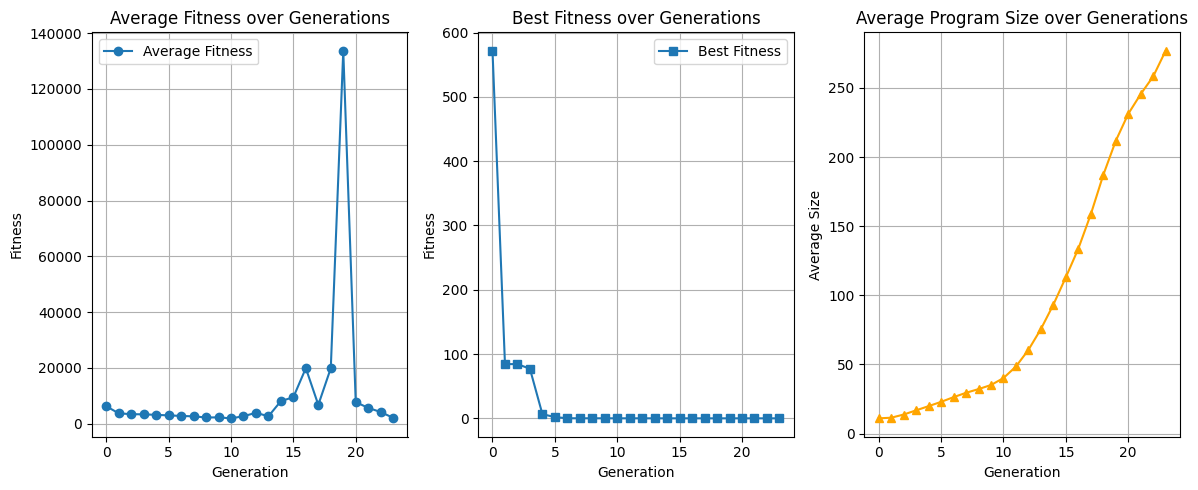

In [7]:
hist.plot()  # TODO finish this function to maybe exclude the outliers or maybe log scale?
# tiny_gp.hist.plot()  # history is also saved with the class

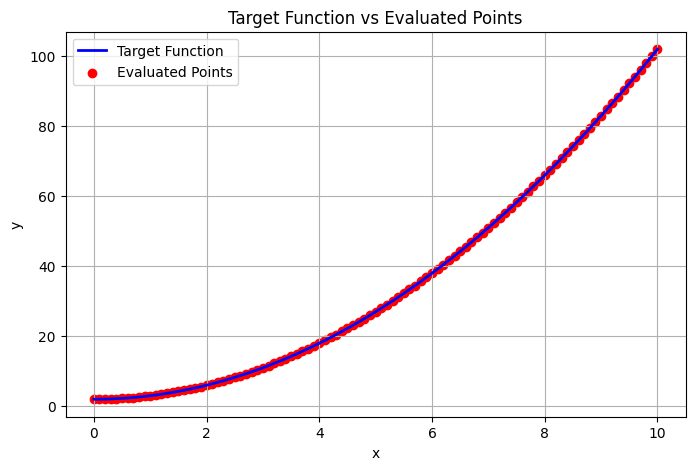

In [8]:
tiny_gp.plot()  # TODO maybe also provide error and type of fitness function?

In [ ]:
def generate_data():
    def generate_data_file(file_name: str, var_num: int, formula: callable, domain_start: float, domain_end: float, num_of_points: Optional[int] = 100):
        if var_num == 1:
            points = np.linspace(domain_start, domain_end, num=num_of_points)
            y_ = formula(points)
            
            plt.plot(points, y_)

            with open(file_name, 'w') as file:
                file.write(f'{var_num} 100 {domain_start} {domain_end} {num_of_points}\n')
                for x in points:
                    y = formula(x)
                    file.write(f'{x} {y}\n')

        if var_num == 2:

            x = np.linspace(domain_start, domain_end, num=num_of_points)
            y = np.linspace(domain_start+1, domain_end+1, num=num_of_points)
            z = formula(x, y)

            fig = plt.figure()
            ax = plt.axes(projection='3d')

            ax.plot3D(x, y, z, 'green')
            ax.set_title('3D Line Plot')
            plt.show()

            with open(file_name, 'w') as file:
                file.write(f'{var_num} 100 {domain_start} {domain_end} {num_of_points}\n')
                for x_, z_ in zip(x, z):
                    file.write(f'{x_} {x_} {z_}\n')

    # 1
    generate_data_file('./data/problem1_a.dat', 1, lambda x: 5*x**3 - 2*x**2 + 3*x - 17, -10, 10, num_of_points=100)
    generate_data_file('./data/problem1_b.dat', 1, lambda x: 5*x**3 - 2*x**2 + 3*x - 17, 0, 100, num_of_points=100)
    generate_data_file('./data/problem1_c.dat', 1, lambda x: 5*x**3 - 2*x**2 + 3*x - 17, -1, 1, num_of_points=100)
    generate_data_file('./data/problem1_d.dat', 1, lambda x: 5*x**3 - 2*x**2 + 3*x - 17, -1000, 1000, num_of_points=100)

    # 2
    generate_data_file('./data/problem2_a.dat', 1, lambda x: np.sin(x) + np.cos(x), -3.14, 3.14, num_of_points=100)
    generate_data_file('./data/problem2_b.dat', 1, lambda x: np.sin(x) + np.cos(x), 0, 7, num_of_points=100)
    generate_data_file('./data/problem2_c.dat', 1, lambda x: np.sin(x) + np.cos(x), 0, 100, num_of_points=100)
    generate_data_file('./data/problem2_d.dat', 1, lambda x: np.sin(x) + np.cos(x), -100, 100, num_of_points=100)   # ciekawa!!!

    # # 3
    generate_data_file('./data/problem3_a.dat', 1, lambda x: 2* np.log(x+1), 0, 4, num_of_points=100)
    generate_data_file('./data/problem3_b.dat', 1, lambda x: 2* np.log(x+1), 0, 9, num_of_points=100)
    generate_data_file('./data/problem3_c.dat', 1, lambda x: 2* np.log(x+1), 0, 99, num_of_points=100)
    generate_data_file('./data/problem3_d.dat', 1, lambda x: 2* np.log(x+1), 0, 999, num_of_points=100)

    # 4
    generate_data_file('./data/problem4_a.dat', 2, lambda x, y: x + 2*y , 0, 1, num_of_points=10000)
    generate_data_file('./data/problem4_b.dat', 2, lambda x, y: x + 2*y , -10, 10, num_of_points=10000)
    generate_data_file('./data/problem4_c.dat', 2, lambda x, y: x + 2*y , 0, 100, num_of_points=10000)
    generate_data_file('./data/problem4_d.dat', 2, lambda x, y: x + 2*y , -1000, 1000, num_of_points=10000)

    # 5
    generate_data_file('./data/problem5_a.dat', 1, lambda x: np.sin(x/2) + 2*np.cos(x), -3.14, 3.14, num_of_points=100)
    generate_data_file('./data/problem5_b.dat', 1, lambda x: np.sin(x/2) + 2*np.cos(x), 0, 7, num_of_points=100)
    generate_data_file('./data/problem5_c.dat', 1, lambda x: np.sin(x/2) + 2*np.cos(x), 0, 100, num_of_points=100)
    generate_data_file('./data/problem5_d.dat', 1, lambda x: np.sin(x/2) + 2*np.cos(x), -100, 100, num_of_points=100)   # ciekawa!!!

    # 6
    generate_data_file('./data/problem6_a.dat', 1, lambda x, y: x**2 + 3*x*y - 7*y + 1, -10, 10, num_of_points=100)
    generate_data_file('./data/problem6_b.dat', 1, lambda x, y: x**2 + 3*x*y - 7*y + 1, 0, 100, num_of_points=100)
    generate_data_file('./data/problem6_c.dat', 1, lambda x, y: x**2 + 3*x*y - 7*y + 1, -1, 1, num_of_points=100)
    generate_data_file('./data/problem6_d.dat', 1, lambda x, y: x**2 + 3*x*y - 7*y + 1, -1000, 1000, num_of_points=100)

In [ ]:
from create_data import generate_data
generate_data()